# Direct stiffness method basic example

In [29]:
# DEPENDENCIES
import math
import copy 
import numpy as np
import matplotlib.pyplot as plt

# constants
E =  200*10**9 #(N/m^2)
A =  0.005 #(m^2)

# we have 2 degrees of freedom each node, so the total degrees of freedom is 2*number of nodes, which is 6
nDof = 6

# the first and third nodes are supports so they are restrained in the x and y directions
# this is used for imposing the boundary conditions
restrained_Dof = [1,2,5,6]

### Utils 
> this section is for defining the functions that will be used in the main code

In [30]:
def kg_generator(E, A, L, Theta):
    """
    This function generates the global stiffness matrix for a bar element

    Args:
        E: Young's modulus
        A: Area of the cross section
        L: Length of the element
        Theta: Angle of the element with respect to the x-axis

    Returns:
        The global stiffness matrix for each element
    """

    c = math.cos(Theta)
    s = math.sin(Theta)

    # quadrants
    K11 = (E*A/L)*np.array([[c**2, c*s], [c*s, s**2]])
    K12 = (E*A/L)*np.array([[-c**2, -c*s], [-c*s, -s**2]])
    K21 = (E*A/L)*np.array([[-c**2, -c*s], [-c*s, -s**2]])
    K22 = (E*A/L)*np.array([[c**2, c*s], [c*s, s**2]])

    return [K11, K12, K21, K22]

## Find the stiffness matrix of each element
to find the stiffness matrix of each element we follow this formula:

$$
k = \frac{E A}{L}
\begin{bmatrix}
c^2 & c s & -c^2 & -c s \\
c s & s^2 & -c s & -s^2 \\
-c^2 & -c s & c^2 & c s \\
-c s & -s^2 & c s & s^2
\end{bmatrix}
$$

where:
- $E$ is the modulus of elasticity
- $A$ is the cross-sectional area
- $L$ is the length of the element
- $c = \cos(\theta)$
- $s = \sin(\theta)$
- $\theta$ is the angle between the element and the x-axis


### element 1

In [31]:
theta = 0 #rads
L = 3 #m

[K11_12, K12_12, K21_12, K22_12] = kg_generator(E, A, L, theta)
KG_12 = kg_generator(E, A, L, theta)

print("global stiffness matrix for element 1 (node 1 to 2)")
print(KG_12)


global stiffness matrix for element 1 (node 1 to 2)
[array([[3.33333333e+08, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00]]), array([[-3.33333333e+08, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00]]), array([[-3.33333333e+08, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00]]), array([[3.33333333e+08, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00]])]


### element 2

In [32]:
theta2 = 2.21 #rads
L2 = 5 #m


[K11_23, K12_23, K21_23, K22_23] = kg_generator(E, A, L2, theta2)
KG_23 = kg_generator(E, A, L2, theta2)

print("global stiffness matrix for element 2 (node 2 to 3)")
print(np.round(KG_23, 3))

global stiffness matrix for element 2 (node 2 to 3)
[[[ 7.11759367e+07 -9.57558007e+07]
  [-9.57558007e+07  1.28824063e+08]]

 [[-7.11759367e+07  9.57558007e+07]
  [ 9.57558007e+07 -1.28824063e+08]]

 [[-7.11759367e+07  9.57558007e+07]
  [ 9.57558007e+07 -1.28824063e+08]]

 [[ 7.11759367e+07 -9.57558007e+07]
  [-9.57558007e+07  1.28824063e+08]]]


## Primary stiffness matrix for structure
to find the primary stiffness matrix of the whole structure, we divide the stiffness matrix of a element we've found above into 4 submatrices and then we add them to the primary stiffness matrix of the structure:

$$
K_{i} =
\begin{bmatrix}
k_{11} & k_{12} & k_{13} & k_{14} \\
k_{21} & k_{22} & k_{23} & k_{24} \\
k_{31} & k_{32} & k_{33} & k_{34} \\
k_{41} & k_{42} & k_{43} & k_{44}
\end{bmatrix}
=
\begin{bmatrix}
K_{11} & K_{12} \\
K_{21} & K_{22}
\end{bmatrix}
$$

then we add the submatrices to the primary stiffness matrix of the structure:

$$
KP=
\begin{bmatrix}
KP_{11} & KP_{12} & KP_{13} \\
KP_{21} & KP_{22} & KP_{23} \\
KP_{31} & KP_{32} & KP_{33}
\end{bmatrix}
$$

the elements of the primary stiffness matrix of the structure are:
$$
KP =
\begin{bmatrix}
Ka_{11} & Ka_{12} & 0 \\
Ka_{21} & Ka_{22} + Kb_{11} & Kb_{12} \\
0 & Kb_{32} & Kb_{33}
\end{bmatrix}
$$





In [33]:
# first row
KP11 = K11_12
KP12 = K12_12
KP13 = np.zeros((2,2))

# second row
KP21 = K21_12
KP22 = K22_12 + K11_23
KP23 = K12_23

# third row
KP31 = np.zeros((2,2))
KP32 = K21_23
KP33 = K22_23

row1 = np.concatenate((KP11, KP12, KP13), axis=1)
row2 = np.concatenate((KP21, KP22, KP23), axis=1)
row3 = np.concatenate((KP31, KP32, KP33), axis=1)

KP = np.concatenate((row1, row2, row3), axis=0)

print("global stiffness matrix for the entire structure")
print(np.round(KP, 3))



global stiffness matrix for the entire structure
[[ 3.33333333e+08  0.00000000e+00 -3.33333333e+08 -0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.33333333e+08 -0.00000000e+00  4.04509270e+08 -9.57558007e+07
  -7.11759367e+07  9.57558007e+07]
 [-0.00000000e+00 -0.00000000e+00 -9.57558007e+07  1.28824063e+08
   9.57558007e+07 -1.28824063e+08]
 [ 0.00000000e+00  0.00000000e+00 -7.11759367e+07  9.57558007e+07
   7.11759367e+07 -9.57558007e+07]
 [ 0.00000000e+00  0.00000000e+00  9.57558007e+07 -1.28824063e+08
  -9.57558007e+07  1.28824063e+08]]


## Adding boundary conditions due to supports
because of the displacement of the support is zero, we can remove the rows and columns or just impose 1 and 0 in the diagonal of the primary stiffness matrix of the structure.

$$
K_{structure} =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & kp_{33} & kp_{34} & 0 & 0 \\
0 & 0 & kp_{43} & kp_{44} & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$


In [34]:
KP_imposed = copy.copy(KP)

KP_imposed[:, 0] = 0
KP_imposed[0, :] = 0
KP_imposed[:, 1] = 0
KP_imposed[1, :] = 0
KP_imposed[:, 4] = 0
KP_imposed[4, :] = 0
KP_imposed[:, 5] = 0
KP_imposed[5, :] = 0

KP_imposed[0, 0] = 1
KP_imposed[1, 1] = 1
KP_imposed[4, 4] = 1
KP_imposed[5, 5] = 1


print("global stiffness matrix for the entire structure with imposed displacements")
print(np.round(KP_imposed, 5))

global stiffness matrix for the entire structure with imposed displacements
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.04509270e+08 -9.57558007e+07
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -9.57558007e+07  1.28824063e+08
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


## Finding the displacement vector
To find the displacement vector we use the formula:

$$
\begin{bmatrix}
u_{x1}  \\
u_{y1}  \\
u_{x2}  \\
u_{y2}  \\
u_{x3}  \\
u_{y3}
\end{bmatrix}
=
\begin{bmatrix}
K_{structure}
\end{bmatrix}^{-1}
\begin{bmatrix}
F_{x1} \\
F_{y1} \\
F_{x2} \\
F_{y2} \\
F_{x3} \\
F_{y3}
\end{bmatrix}
$$

where:
- $u$ is the displacement vector
- $F$ is the force 

In this case we can simplify the formula to:

$$
\begin{bmatrix}
u_{x2}  \\
u_{y2}  
\end{bmatrix}
=
\begin{bmatrix}
kp_{33} & kp_{34} \\
kp_{43} & kp_{33}
\end{bmatrix}^{-1}
\begin{bmatrix}
0 \\
150
\end{bmatrix}
$$

- The force is 150 because the force is applied in the y direction and the displacement in the x direction is zero.
- The displacement we have found is the global displacement at node 2.


In [35]:
KS = KP[2:4, 2:4]
print("Stiffness matrix of the structure")
print(np.round(KS, 3))
print(type(KS),"\n")

KS_inv = np.linalg.inv(KS)
print("Inverse of the stiffness matrix of the structure:")
print(np.round(KS_inv, 3),"\n")

F = np.array([[0], [-150000]])

U = np.dot(KS_inv, F)

print ("Displacement vector:")
print(U,"\n")

def print_displacement(U):
    if U[0, 0] < 0:
        horizontal_disp = "to the left"
    else:
        horizontal_disp = "to the right"
    
    if U[1, 0] < 0:
        vertical_disp = "downward"
    else:
        vertical_disp = "upward"
    
    print(f"Horizontal displacements at node 2: {np.round((abs(U[0,0])), 6)} m ({horizontal_disp})")
    print(f"Vertical displacements at node 2: {np.round((abs(U[1,0])), 6)} m ({vertical_disp})")

print_displacement(U)


Stiffness matrix of the structure
[[ 4.04509270e+08 -9.57558007e+07]
 [-9.57558007e+07  1.28824063e+08]]
<class 'numpy.ndarray'> 

Inverse of the stiffness matrix of the structure:
[[0. 0.]
 [0. 0.]] 

Displacement vector:
[[-0.00033449]
 [-0.00141301]] 

Horizontal displacements at node 2: 0.000334 m (to the left)
Vertical displacements at node 2: 0.001413 m (downward)


## Finding the reaction forces
To find the reaction forces we use the formula:

$$
\begin{bmatrix}
F_{x1} \\
F_{y1} \\
F_{x2} \\
F_{y2} \\
F_{x3} \\
F_{y3}
\end{bmatrix}
=
\begin{bmatrix}
K_{primary}
\end{bmatrix}
\begin{bmatrix}
U_{global}
\end{bmatrix}
$$

where:
- $F$ is the force (it can be reaction or the force applied)
- $K_{primary}$ is the primary stiffness matrix of the structure (the matrix we haven't imposed the boundary conditions)
- $U_{global}$ is the global displacement vector


In [36]:
UG  = np.array([[0], [0], [U[0, 0]], [U[1, 0]], [0], [0]])
# transpose the global displacement vector
print (UG.T)

F = np.dot(KP, UG)

print("Force vector:")
print(np.round(F, 3))

[[ 0.          0.         -0.00033449 -0.00141301  0.          0.        ]]
Force vector:
[[ 111496.018]
 [      0.   ]
 [     -0.   ]
 [-150000.   ]
 [-111496.018]
 [ 150000.   ]]


## Internal force in element 1
To find the internal force in element 1 we use the formula:

$$
F = \frac{E A}{L} \cdot (Ux_{local 2} - Ux_{local 1})
$$

In the case the bar element have an angle with the x-axis, we need to rotate the displacement vector to the local coordinate system of the element. To do that we use the formula:

$$
\begin{matrix}
Ux_{local 1} \\ 
Uy_{local 2}
\end{matrix}
= 
\begin{bmatrix}
c & s & 0 & 0 \\
0 & 0 & c & s 
\end{bmatrix}
\cdot
\begin{bmatrix}
Ux_{global 1} \\
Uy_{global 1} \\
Ux_{global 2} \\
Uy_{global 2}
\end{bmatrix}
$$


In [37]:
# transformation matrix
c = math.cos(theta)
s = math.sin(theta)
T = np.array([[c, s, 0, 0], [0, 0, c, s]])

print("Transformation matrix:")
print(T,"\n")

# global displacement vector
print("Global displacement vector:")
UGW = np.array([[0], [0], [U[0, 0]], [U[1, 0]]])
print(UGW,"\n")

# local displacement vector 
print("Local displacement vector:")
UL = np.dot(T, UGW)
print(UL[0])
print(UL[1],"\n")

# local force vector
print("Local force:")
FL1 = (E*A/L)*(UL[0] - UL[1])
print(round(FL1.item()/1000, 3), "kN")


Transformation matrix:
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]] 

Global displacement vector:
[[ 0.        ]
 [ 0.        ]
 [-0.00033449]
 [-0.00141301]] 

Local displacement vector:
[0.]
[-0.00033449] 

Local force:
111.496 kN


## Internal force in element 2

In [38]:
## Internal force in element 2
# transformation matrix
c = math.cos(theta2)
s = math.sin(theta2)
T2 = np.array([[c, s, 0, 0], [0, 0, c, s]])

# global displacement vector
UGW2 = np.array([[U[0, 0]], [U[1, 0]], [0], [0]])

# local displacement vector
UL2 = np.dot(T2, UGW2)

# local force vector
FL2 = (E*A/L2)*(UL2[0] - UL2[1])
print("Internal force in element 2:")
print(round(FL2.item()/1000, 3), "kN")

Internal force in element 2:
-186.899 kN


# Plotting the structure

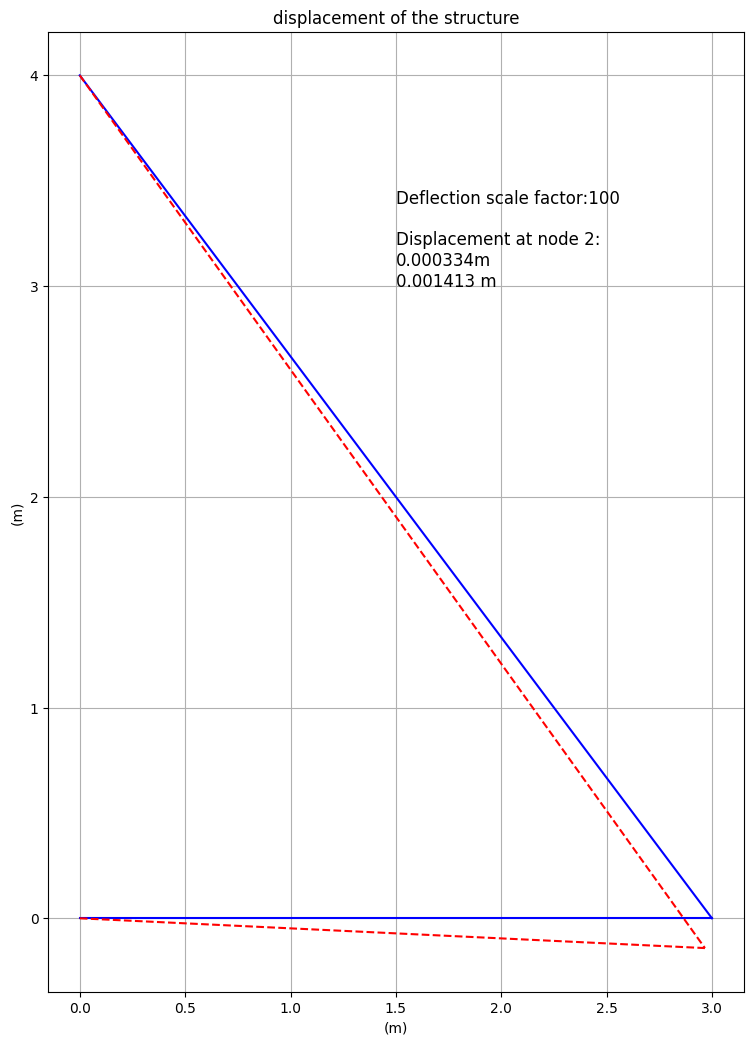

In [39]:
Xfactor = 100

label = "Deflection scale factor:" + str(Xfactor)  + "\n \nDisplacement at node 2: \n" + str(np.round((abs(U[0,0])), 6)) + "m\n" + str(np.round((abs(U[1,0])), 6)) + " m"

fig = plt.figure()
axes = fig.add_axes([0,0,2,2])
fig.gca().set_aspect('equal', adjustable='box')

# original structure
axes.plot([0, 3], [0, 0], 'b')
axes.plot([0, 3], [4, 0], 'b')

# deformed structure
axes.plot([0, 3+U[0,0].item()*Xfactor], [0, 0+U[1,0].item()*Xfactor], '--r')
axes.plot([0, 3+U[0,0].item()*Xfactor], [4, 0+U[1,0].item()*Xfactor], '--r')

axes.grid()
axes.set_xlabel('(m)') 
axes.set_ylabel('(m)')
axes.set_title('displacement of the structure')

plt.text(1.5,3, label, fontsize=12, color='black')
plt.show()